# Text Classification with RNN and its Variants

## Problem Statement
In this assignment, we'll build a text classification model to detect sarcasm in news headlines.
We'll use Recurrent Neural Networks (RNNs) and their variants like LSTM and GRU to classify
headlines as sarcastic or not sarcastic.

This notebook implements:
1. Text preprocessing and visualization
2. Multiple RNN variants (Simple RNN, LSTM, GRU, BiLSTM, Word2Vec LSTM)
3. Model evaluation and comparison
4. Interactive sarcasm detection using Gradio

## 1. Package Installation

First, we need to install the required packages for our text classification task. This includes:
- NumPy 1.23.5 for numerical operations
- TensorFlow 2.12.0 for deep learning
- Pandas 1.5.3 for data manipulation
- SciPy 1.10.1 for scientific computing
- Matplotlib 3.7.1 and Seaborn 0.12.2 for visualization
- NLTK 3.8.1 for natural language processing
- Scikit-learn 1.2.2 for machine learning utilities
- Gensim 4.3.0 for word embeddings
- Gradio for building the interactive interface

In [2]:
# Install all required packages with compatible versions for Python 3.11
!pip install numpy==1.23.5
!pip install tensorflow==2.12.0
!pip install pandas==1.5.3 scipy==1.10.1 matplotlib==3.7.1 seaborn==0.12.2
!pip install nltk==3.8.1 scikit-learn==1.2.2 gensim==4.3.0 gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 84.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.23.5 which is inco

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 117.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uni

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 129.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 28.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Success

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 121.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 106.0 MB/s eta 0:00:00
  Created wheel for fst-pso: filename=fst_pso-1.8.1

## 2. Environment Setup

In this section, we'll import all necessary libraries and set up our environment for the text classification task. This includes:
- Data manipulation libraries (NumPy, Pandas)
- Visualization libraries (Matplotlib, Seaborn)
- Text processing libraries (NLTK)
- Deep learning frameworks (TensorFlow, Keras)
- Word embedding utilities (Gensim)
- GUI framework (Gradio)

In [1]:
# Import necessary libraries - optimized to only include what's needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter
from wordcloud import WordCloud

# For text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# For deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# For word embeddings
import gensim
from gensim.models import Word2Vec

# For GUI
import gradio as gr

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## 3. Data Loading

Here we'll load the dataset containing news headlines labeled as sarcastic (1) or non-sarcastic (0). The function handles:
- File upload in Google Colab
- Zip file extraction if needed
- CSV file identification and loading
- Error handling for different environments

In [2]:
# Function to load data with proper error handling
def load_data():
    try:
        # For Google Colab environment
        from google.colab import files
        print("Please upload the sarcastic_headlines.csv file")
        uploaded = files.upload()  # This will prompt you to select the sarcastic_headlines.csv file

        # If file was uploaded as zip
        zip_files = [f for f in os.listdir('.') if f.endswith('.zip')]

        if zip_files:
            import zipfile
            # Use the first zip file found
            with zipfile.ZipFile(zip_files[0], 'r') as zip_ref:
                print("Contents of zip file:", zip_ref.namelist())
                zip_ref.extractall('.')

        # Search for CSV files recursively
        csv_files = []
        for root, dirs, files in os.walk('.'):
            for file in files:
                if file.endswith('.csv'):
                    csv_files.append(os.path.join(root, file))

        print("Found CSV files:", csv_files)

        # Load the first CSV file found
        if csv_files:
            # Try to find the sarcastic_headlines.csv specifically
            sarcasm_csv = [f for f in csv_files if 'sarcastic_headlines' in f.lower()]
            if sarcasm_csv:
                return pd.read_csv(sarcasm_csv[0])
            else:
                return pd.read_csv(csv_files[0])
        else:
            print("No CSV files found.")
            return None
    except:
        # For local environment or direct path
        print("Running in local environment, trying direct file access")
        try:
            return pd.read_csv('./8. Sarcastic or Not Sarcastic Dataset/sarcastic_headlines.csv')
        except:
            try:
                return pd.read_csv('sarcastic_headlines.csv')
            except:
                print("Could not load dataset. Please ensure the CSV file is available.")
                return None

# Load data
data = load_data()

# Verify data was loaded correctly
if data is not None:
    print(f"Dataset shape: {data.shape}")
    print(data.head())

    # Check for missing values
    print("\nMissing values:")
    print(data.isnull().sum())
else:
    print("Failed to load data. Please check the dataset path.")

Please upload the sarcastic_headlines.csv file


Saving 8. Sarcastic or Not Sarcastic Dataset-20250504T093622Z-001.zip to 8. Sarcastic or Not Sarcastic Dataset-20250504T093622Z-001.zip
Contents of zip file: ['8. Sarcastic or Not Sarcastic Dataset/8.Description Sarcastic or Not Dataset.txt', '8. Sarcastic or Not Sarcastic Dataset/sarcastic_headlines.csv']
Found CSV files: ['./8. Sarcastic or Not Sarcastic Dataset/sarcastic_headlines.csv', './sample_data/california_housing_train.csv', './sample_data/mnist_test.csv', './sample_data/california_housing_test.csv', './sample_data/mnist_train_small.csv']
Dataset shape: (28619, 2)
                                            headline  is_sarcastic
0  thirtysomething scientists unveil doomsday clo...             1
1  dem rep. totally nails why congress is falling...             0
2  eat your veggies: 9 deliciously different recipes             0
3  inclement weather prevents liar from getting t...             1
4  mother comes pretty close to using word 'strea...             1

Missing values:


## 4. Data Exploration and Visualization

This section explores the dataset's structure and characteristics:
- Class distribution (sarcastic vs. non-sarcastic)
- Sample headlines from each class
- Length distribution of headlines (characters and word count)
- Word clouds to visualize frequent words in each class


Class distribution (%):
0    52.36032
1    47.63968
Name: is_sarcastic, dtype: float64


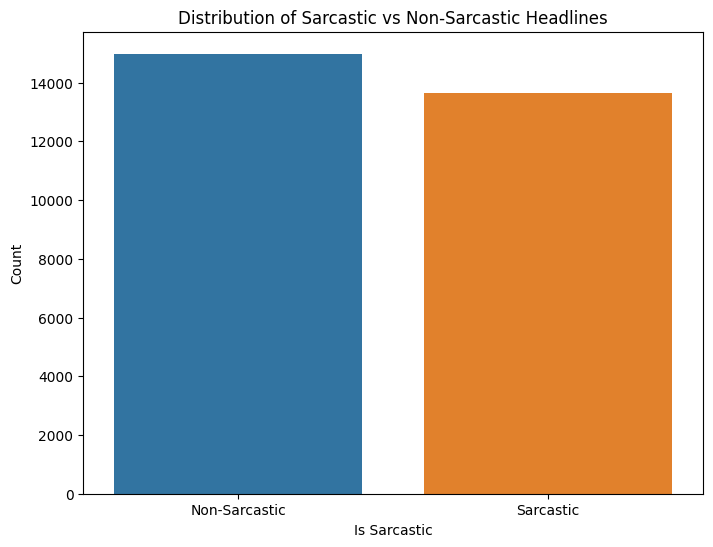


Non-Sarcastic Headlines Examples:
['dem rep. totally nails why congress is falling short on gender, racial equality'
 'eat your veggies: 9 deliciously different recipes'
 'my white inheritance' '5 ways to file your taxes with less stress'
 'lots of parents know this scenario']

Sarcastic Headlines Examples:
['thirtysomething scientists unveil doomsday clock of hair loss'
 'inclement weather prevents liar from getting to work'
 "mother comes pretty close to using word 'streaming' correctly"
 "richard branson's global-warming donation nearly as much as cost of failed balloon trips"
 'shadow government getting too large to meet in marriott conference room b']


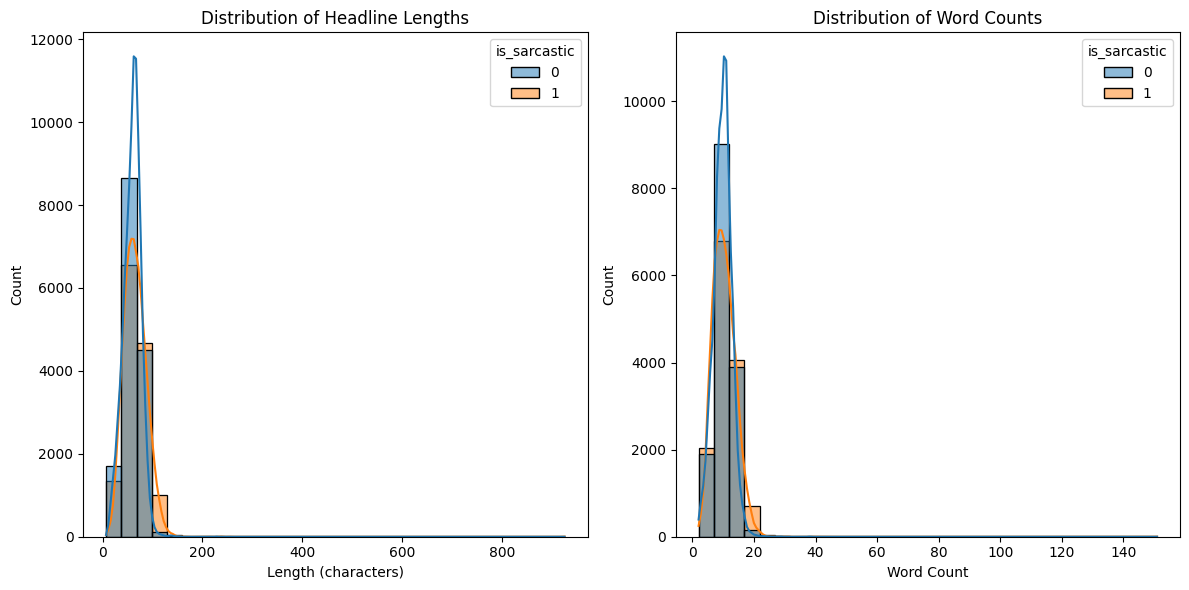

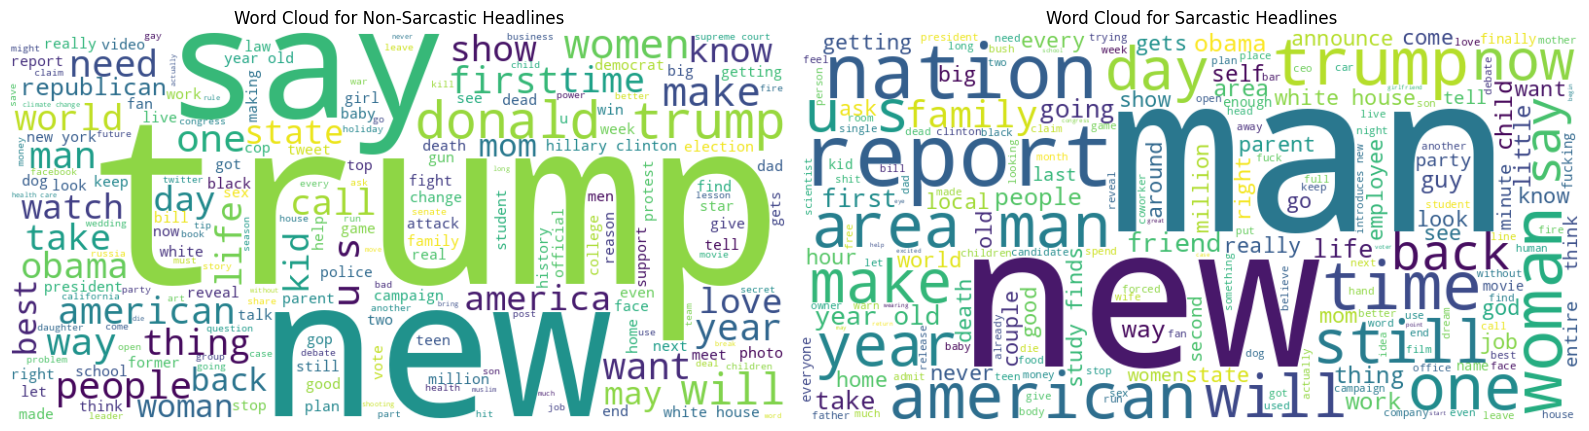

In [3]:
# Only proceed if data is loaded correctly
if data is not None:
    # Check class distribution
    class_distribution = data['is_sarcastic'].value_counts(normalize=True) * 100
    print("\nClass distribution (%):")
    print(class_distribution)

    # Visualize class distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(x='is_sarcastic', data=data)
    plt.title('Distribution of Sarcastic vs Non-Sarcastic Headlines')
    plt.xlabel('Is Sarcastic')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Non-Sarcastic', 'Sarcastic'])
    plt.show()

    # Display examples from each class
    print("\nNon-Sarcastic Headlines Examples:")
    print(data[data['is_sarcastic'] == 0]['headline'].head(5).values)

    print("\nSarcastic Headlines Examples:")
    print(data[data['is_sarcastic'] == 1]['headline'].head(5).values)

    # Analyze headline lengths
    data['headline_length'] = data['headline'].apply(len)
    data['word_count'] = data['headline'].apply(lambda x: len(x.split()))

    # Plot length distributions
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x='headline_length', hue='is_sarcastic', kde=True, bins=30)
    plt.title('Distribution of Headline Lengths')
    plt.xlabel('Length (characters)')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x='word_count', hue='is_sarcastic', kde=True, bins=30)
    plt.title('Distribution of Word Counts')
    plt.xlabel('Word Count')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

    # Create word clouds for each class
    plt.figure(figsize=(16, 8))

    # For non-sarcastic headlines
    non_sarcastic_text = ' '.join(data[data['is_sarcastic'] == 0]['headline'])
    plt.subplot(1, 2, 1)
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(non_sarcastic_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Word Cloud for Non-Sarcastic Headlines')
    plt.axis('off')

    # For sarcastic headlines
    sarcastic_text = ' '.join(data[data['is_sarcastic'] == 1]['headline'])
    plt.subplot(1, 2, 2)
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(sarcastic_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Word Cloud for Sarcastic Headlines')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

## 5. Text Preprocessing

Text preprocessing is crucial for NLP tasks. In this section, we'll:
- Expand contractions (e.g., "don't" → "do not")
- Clean text (lowercase, remove special characters/URLs/numbers)
- Remove stopwords (common words like "the", "and")
- Apply lemmatization (reducing words to their base form)
- Analyze most frequent words in each class

Original vs. Cleaned Headlines:
Original: thirtysomething scientists unveil doomsday clock of hair loss
Cleaned : thirtysomething scientists unveil doomsday clock of hair loss

Original: dem rep. totally nails why congress is falling short on gender, racial equality
Cleaned : dem rep totally nails why congress is falling short on gender racial equality

Original: eat your veggies: 9 deliciously different recipes
Cleaned : eat your veggies deliciously different recipes

Original: inclement weather prevents liar from getting to work
Cleaned : inclement weather prevents liar from getting to work

Original: mother comes pretty close to using word 'streaming' correctly
Cleaned : mother comes pretty close to using word streaming correctly

Cleaned vs. Lemmatized Headlines:
Cleaned   : thirtysomething scientists unveil doomsday clock of hair loss
Lemmatized: thirtysomething scientist unveil doomsday clock hair loss

Cleaned   : dem rep totally nails why congress is falling short on gender rac

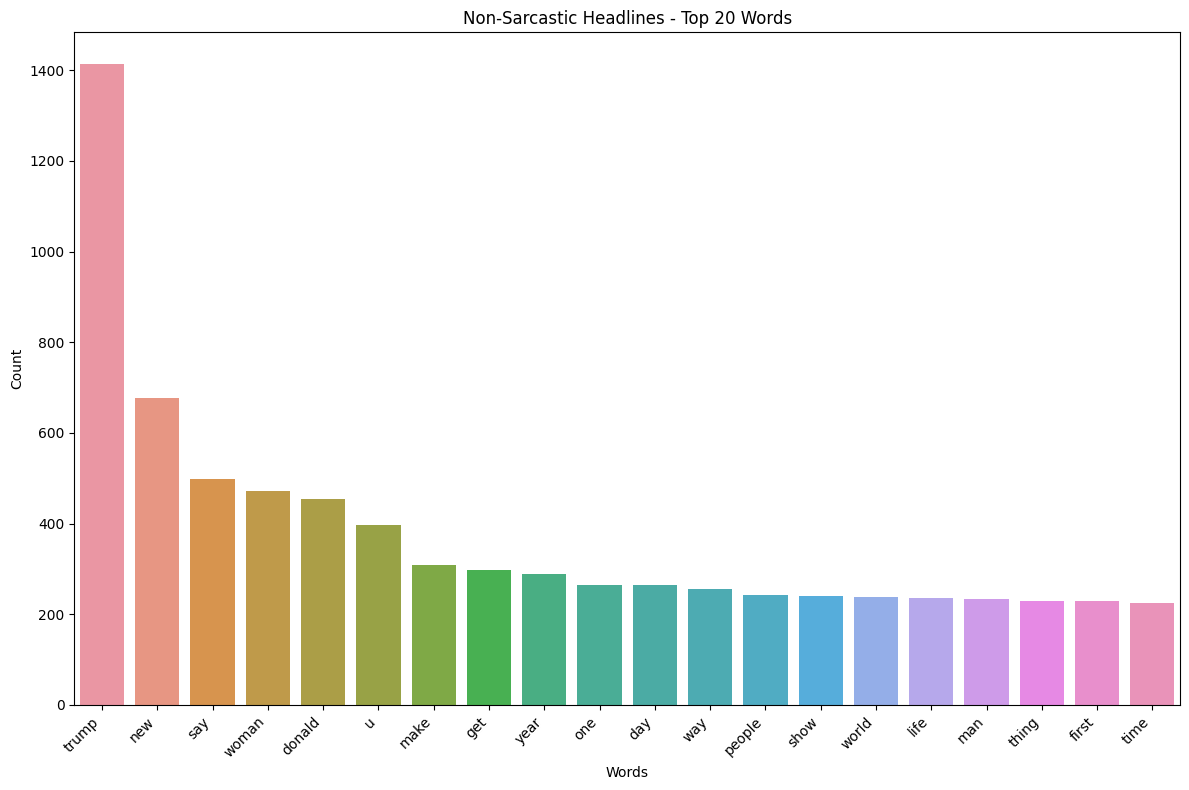

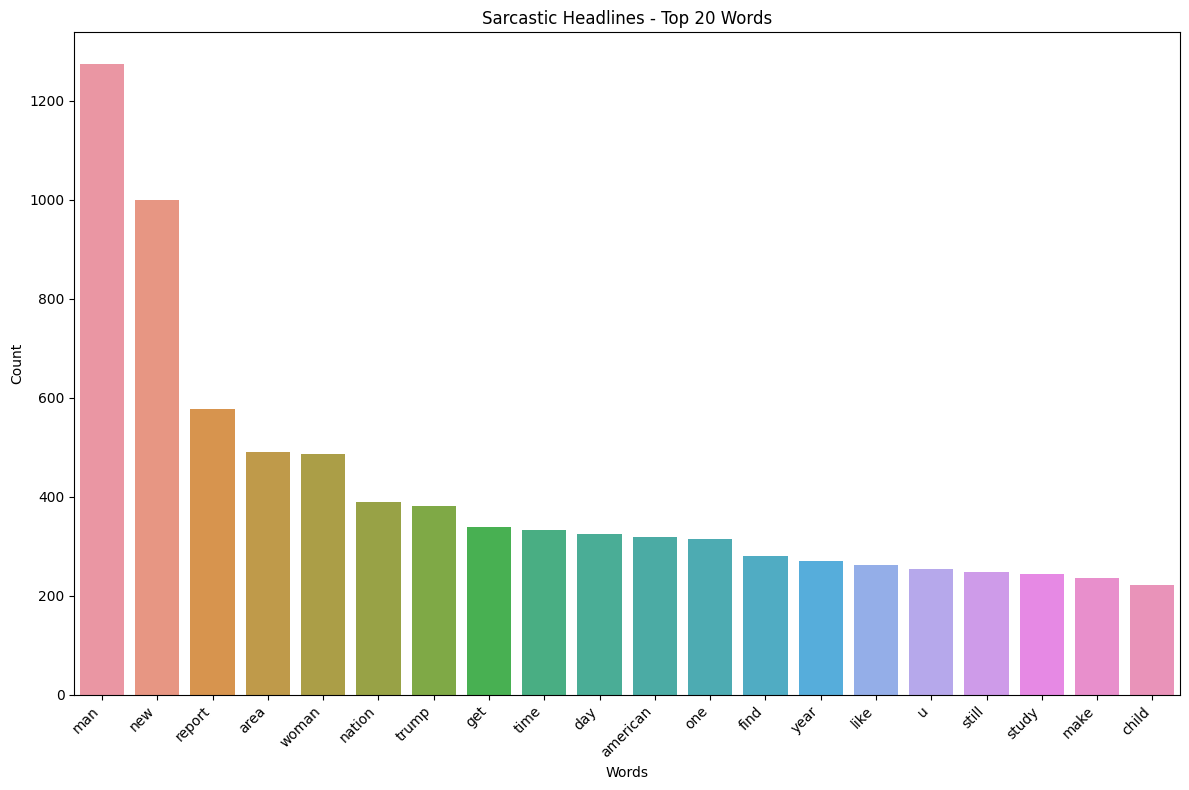

In [4]:
# Dictionary for expanding contractions
contractions_dict = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "couldn't": "could not",
    "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
    "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'll": "he will",
    "he's": "he is", "i'd": "I would", "i'll": "I will", "i'm": "I am", "i've": "I have",
    "isn't": "is not", "it's": "it is", "let's": "let us", "mustn't": "must not",
    "shan't": "shall not", "she'd": "she would", "she'll": "she will", "she's": "she is",
    "shouldn't": "should not", "that's": "that is", "there's": "there is", "they'd": "they would",
    "they'll": "they will", "they're": "they are", "they've": "they have", "we'd": "we would",
    "we'll": "we will", "we're": "we are", "we've": "we have", "weren't": "were not",
    "what'll": "what will", "what're": "what are", "what's": "what is", "what've": "what have",
    "where's": "where is", "who'd": "who would", "who'll": "who will", "who're": "who are",
    "who's": "who is", "who've": "who have", "won't": "will not", "wouldn't": "would not",
    "you'd": "you would", "you'll": "you will", "you're": "you are", "you've": "you have"
}

# Function to expand contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                    flags=re.IGNORECASE)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match.lower(), match)
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

# Define a text cleaning function
def clean_text(text):
    # Handle NaN values
    if isinstance(text, float) and np.isnan(text):
        return ""

    # Expand contractions
    text = expand_contractions(text)

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user @ references and '#' from text
    text = re.sub(r'\@\w+|\#', '', text)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Define lemmatization function
def lemmatize_text(text):
    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return ' '.join(lemmatized_tokens)

# Apply text cleaning and lemmatization
if data is not None:
    # Clean headlines
    data['cleaned_headline'] = data['headline'].apply(clean_text)

    # Display examples of cleaned headlines
    print("Original vs. Cleaned Headlines:")
    for i in range(5):
        print(f"Original: {data['headline'].iloc[i]}")
        print(f"Cleaned : {data['cleaned_headline'].iloc[i]}")
        print()

    # Apply lemmatization
    data['lemmatized_headline'] = data['cleaned_headline'].apply(lemmatize_text)

    # Display examples of lemmatized headlines
    print("Cleaned vs. Lemmatized Headlines:")
    for i in range(5):
        print(f"Cleaned   : {data['cleaned_headline'].iloc[i]}")
        print(f"Lemmatized: {data['lemmatized_headline'].iloc[i]}")
        print()

    # Show most frequent words in each class
    def plot_most_common_words(data, class_value, title, n=20):
        text = ' '.join(data[data['is_sarcastic'] == class_value]['lemmatized_headline'])
        words = text.split()
        word_counts = Counter(words)
        most_common = word_counts.most_common(n)

        plt.figure(figsize=(12, 8))
        sns.barplot(x=[word[0] for word in most_common], y=[word[1] for word in most_common])
        plt.title(f'{title} - Top {n} Words')
        plt.xlabel('Words')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    # Plot most common words for each class
    plot_most_common_words(data, 0, 'Non-Sarcastic Headlines')
    plot_most_common_words(data, 1, 'Sarcastic Headlines')

## 6. Tokenization and Sequence Padding

To feed text into neural networks, we need to convert words to numbers:
- Tokenize text (convert words to numerical indices)
- Create vocabulary with maximum size limit
- Convert sentences to sequences of integers
- Calculate optimal sequence length (95th percentile)
- Pad sequences to uniform length
- Visualize sequence length distribution

Training set size: 22895
Testing set size: 5724
Vocabulary Size: 10000
Total Unique Words: 22579
95th percentile sequence length: 11
Shape of X_train_padded: (22895, 11)
Shape of X_test_padded: (5724, 11)
Original text:
paramount executive snap script begin studio logo fading establishing shot actual mountain

Tokenized sequence:
[4188, 593, 3371, 2671, 376, 1269, 3372, 6575, 8409, 356, 2309, 2182]

Padded sequence:
[4188  593 3371 2671  376 1269 3372 6575 8409  356 2309]


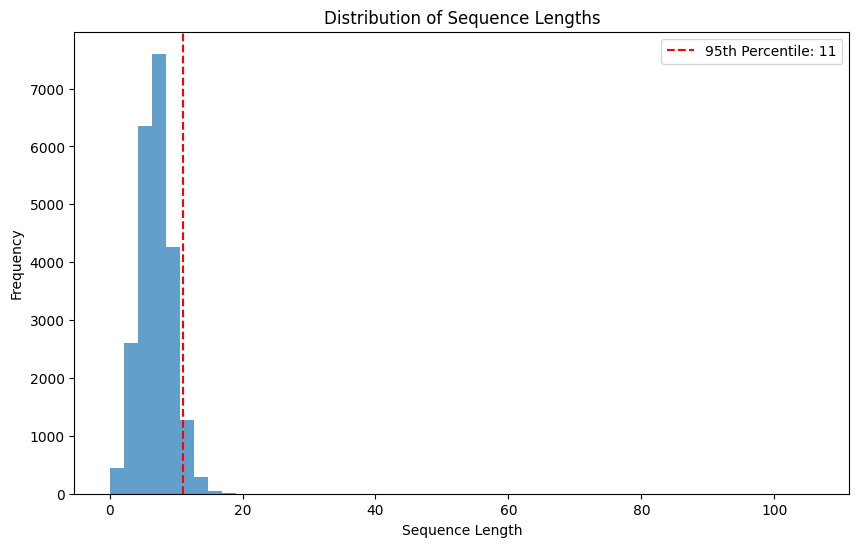

In [5]:
if data is not None:
    # Split the data into features and target
    X = data['lemmatized_headline'].values
    y = data['is_sarcastic'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")

    # Define tokenizer parameters
    MAX_NB_WORDS = 10000  # Maximum number of words to keep

    # Initialize and fit the tokenizer on training data
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS, oov_token="<OOV>")
    tokenizer.fit_on_texts(X_train)

    # Get word index and vocabulary size
    word_index = tokenizer.word_index
    vocab_size = min(MAX_NB_WORDS, len(word_index) + 1)
    print(f"Vocabulary Size: {vocab_size}")
    print(f"Total Unique Words: {len(word_index)}")

    # Convert text to sequences
    X_train_sequences = tokenizer.texts_to_sequences(X_train)
    X_test_sequences = tokenizer.texts_to_sequences(X_test)

    # Calculate 95th percentile of sequence lengths for dynamic padding
    train_seq_lengths = [len(seq) for seq in X_train_sequences]
    MAX_SEQUENCE_LENGTH = int(np.percentile(train_seq_lengths, 95))
    print(f"95th percentile sequence length: {MAX_SEQUENCE_LENGTH}")

    # Pad sequences to ensure uniform length
    X_train_padded = pad_sequences(X_train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
    X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

    print(f"Shape of X_train_padded: {X_train_padded.shape}")
    print(f"Shape of X_test_padded: {X_test_padded.shape}")

    # Display an example of a tokenized and padded sequence
    print("Original text:")
    print(X_train[0])
    print("\nTokenized sequence:")
    print(X_train_sequences[0])
    print("\nPadded sequence:")
    print(X_train_padded[0])

    # Plot sequence length distribution
    plt.figure(figsize=(10, 6))
    plt.hist(train_seq_lengths, bins=50, alpha=0.7)
    plt.axvline(x=MAX_SEQUENCE_LENGTH, color='r', linestyle='--', label=f'95th Percentile: {MAX_SEQUENCE_LENGTH}')
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Sequence Lengths')
    plt.legend()
    plt.show()

## 7. Helper Functions for Model Training

Before building models, we define utility functions for:
- Visualizing training progress (accuracy and loss curves)
- Evaluating model performance (confusion matrix, classification report)
- Comparing different models consistently

In [6]:
# Define a function to plot model training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Function to evaluate and display model performance
def evaluate_model(model, X_test, y_test, model_name):
    # Predict on test data
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Non-Sarcastic', 'Sarcastic'],
                yticklabels=['Non-Sarcastic', 'Sarcastic'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    return accuracy

## 8. Model Building and Training

We'll implement multiple RNN-based models to detect sarcasm in headlines:

### 8.1 Simple RNN Model

First, we'll implement a basic Recurrent Neural Network with:
- Embedding layer to represent words as dense vectors
- SimpleRNN layers for sequence processing
- Dropout layers to prevent overfitting
- Dense layers for classification

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 11, 100)           1000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 11, 128)           29312     
                                                                 
 dropout (Dropout)           (None, 11, 128)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 3

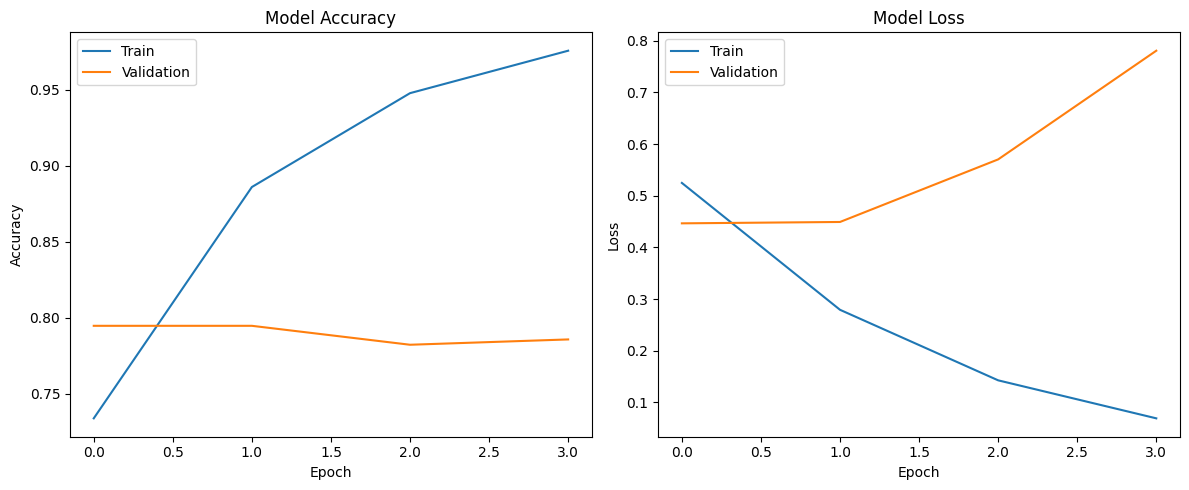

179/179 [==============================] - 1s 3ms/step
Simple RNN Accuracy: 0.7876

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      2997
           1       0.76      0.81      0.78      2727

    accuracy                           0.79      5724
   macro avg       0.79      0.79      0.79      5724
weighted avg       0.79      0.79      0.79      5724



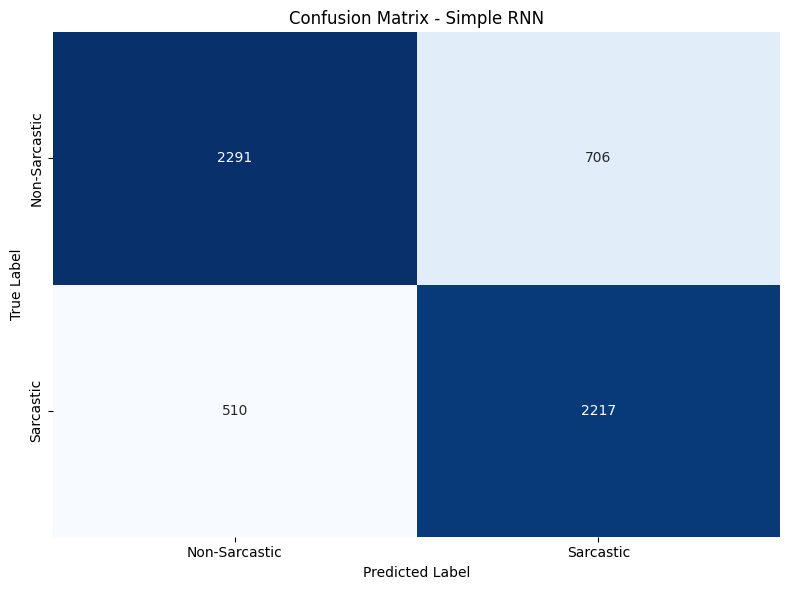

In [7]:
if data is not None:
    # Define model parameters
    EMBEDDING_DIM = 100
    VALIDATION_SPLIT = 0.2

    # Build Simple RNN model
    simple_rnn_model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        SimpleRNN(128, return_sequences=True),
        Dropout(0.3),
        SimpleRNN(64),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    simple_rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Display model summary
    simple_rnn_model.summary()

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('simple_rnn_model.h5', monitor='val_accuracy',
                                      save_best_only=True, mode='max')

    # Train the model
    simple_rnn_history = simple_rnn_model.fit(
        X_train_padded, y_train,
        epochs=20,
        batch_size=64,
        validation_split=VALIDATION_SPLIT,
        callbacks=[early_stopping, model_checkpoint],
        verbose=1
    )

    # Plot training history
    plot_training_history(simple_rnn_history)

    # Evaluate Simple RNN model
    simple_rnn_accuracy = evaluate_model(simple_rnn_model, X_test_padded, y_test, "Simple RNN")

### 8.2 LSTM Model

Long Short-Term Memory (LSTM) networks can better capture long-term dependencies:
- Embedding layer with spatial dropout
- LSTM layers with recurrent dropout
- Dense output layers for binary classification

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 11, 100)           1000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 11, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 11, 128)           117248    
                                                                 
 dropout_2 (Dropout)         (None, 11, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

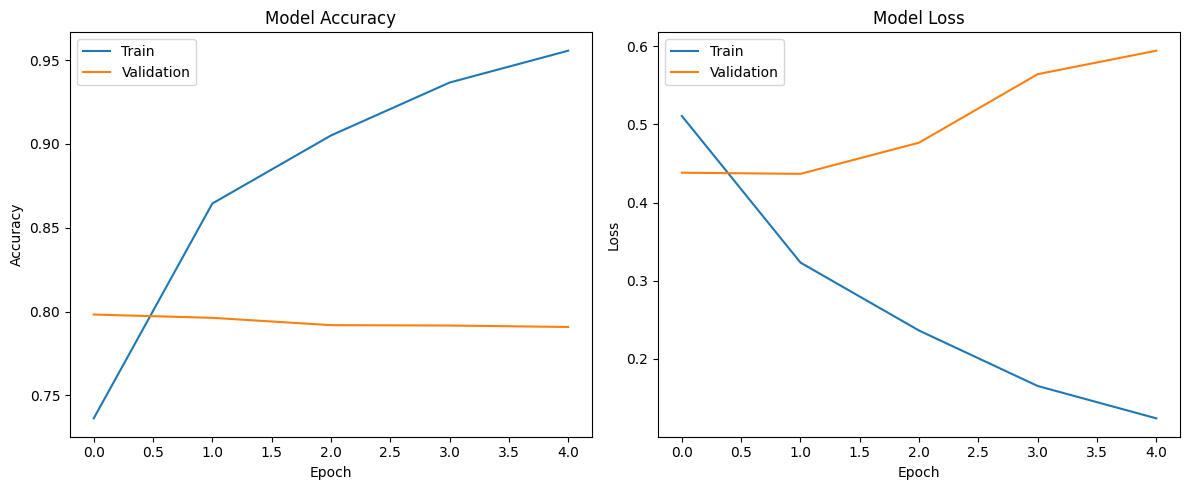

179/179 [==============================] - 2s 7ms/step
LSTM Accuracy: 0.7855

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      2997
           1       0.83      0.69      0.75      2727

    accuracy                           0.79      5724
   macro avg       0.79      0.78      0.78      5724
weighted avg       0.79      0.79      0.78      5724



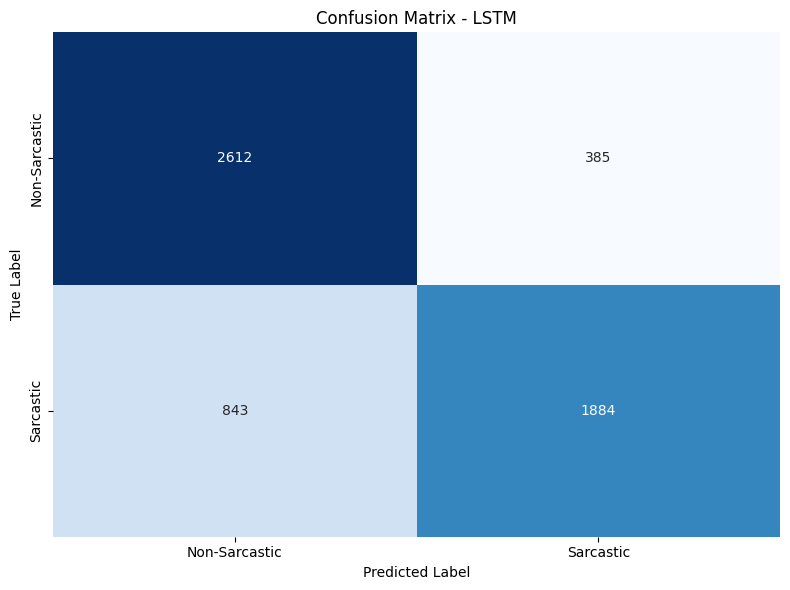

In [8]:
if data is not None:
    # Build LSTM model
    lstm_model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        SpatialDropout1D(0.2),  # Helps with overfitting in embedding layer
        LSTM(128, return_sequences=True),
        Dropout(0.3),
        LSTM(64),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Display model summary
    lstm_model.summary()

    # Define callbacks for LSTM model
    lstm_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_accuracy',
                                  save_best_only=True, mode='max')

    # Train the LSTM model
    lstm_history = lstm_model.fit(
        X_train_padded, y_train,
        epochs=20,
        batch_size=64,
        validation_split=VALIDATION_SPLIT,
        callbacks=[early_stopping, lstm_checkpoint],
        verbose=1
    )

    # Plot LSTM training history
    plot_training_history(lstm_history)

    # Evaluate LSTM model
    lstm_accuracy = evaluate_model(lstm_model, X_test_padded, y_test, "LSTM")

### 8.3 GRU Model

Gated Recurrent Units (GRU) are a simpler alternative to LSTM:
- Similar architecture to LSTM but with fewer parameters
- Often faster to train while maintaining good performance

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 11, 100)           1000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 11, 100)          0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 11, 128)           88320     
                                                                 
 dropout_4 (Dropout)         (None, 11, 128)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                      

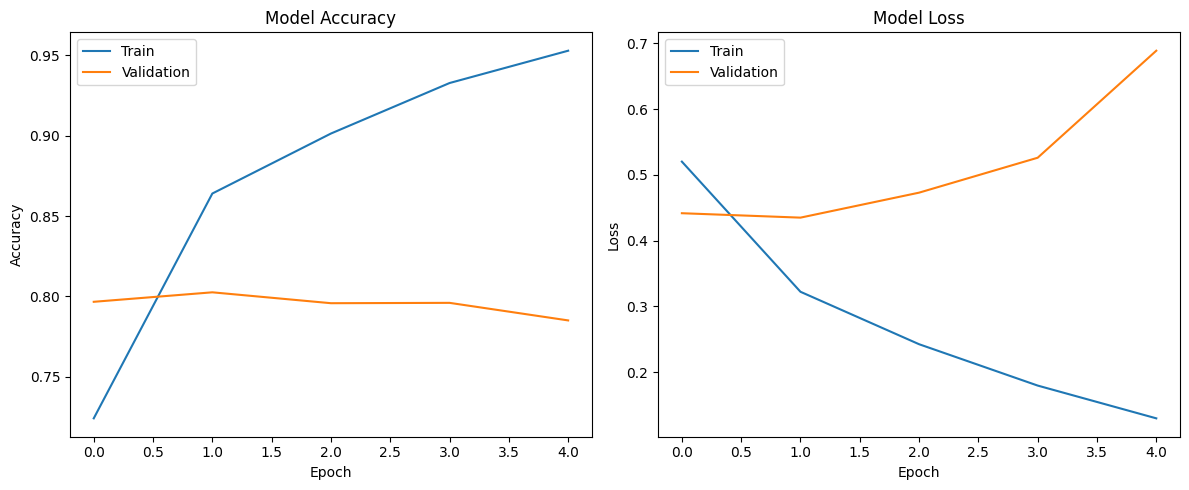

179/179 [==============================] - 1s 4ms/step
GRU Accuracy: 0.7926

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2997
           1       0.82      0.72      0.77      2727

    accuracy                           0.79      5724
   macro avg       0.80      0.79      0.79      5724
weighted avg       0.80      0.79      0.79      5724



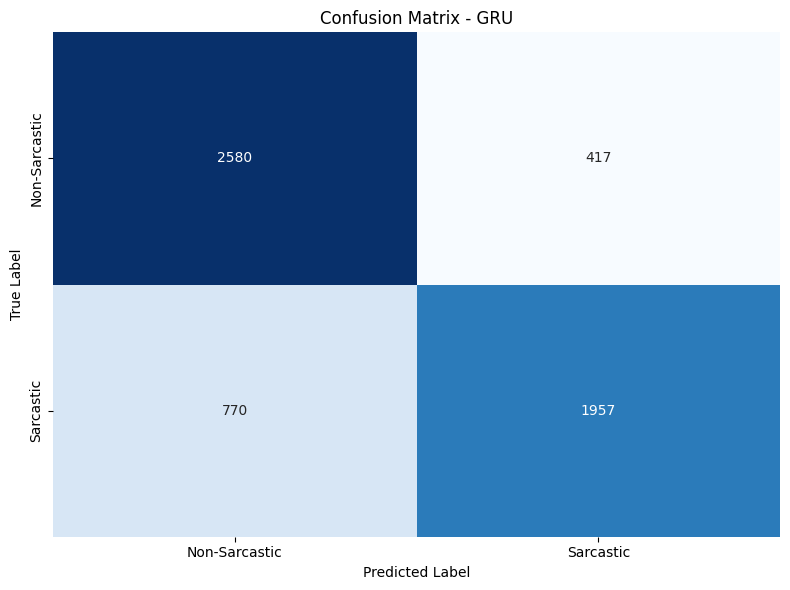

In [9]:
if data is not None:
    # Build GRU model
    gru_model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        SpatialDropout1D(0.2),
        GRU(128, return_sequences=True),
        Dropout(0.3),
        GRU(64),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Display model summary
    gru_model.summary()

    # Define callbacks for GRU model
    gru_checkpoint = ModelCheckpoint('gru_model.h5', monitor='val_accuracy',
                                   save_best_only=True, mode='max')

    # Train the GRU model
    gru_history = gru_model.fit(
        X_train_padded, y_train,
        epochs=20,
        batch_size=64,
        validation_split=VALIDATION_SPLIT,
        callbacks=[early_stopping, gru_checkpoint],
        verbose=1
    )

    # Plot GRU training history
    plot_training_history(gru_history)

    # Evaluate GRU model
    gru_accuracy = evaluate_model(gru_model, X_test_padded, y_test, "GRU")

### 8.4 Bidirectional LSTM Model

Bidirectional models process sequences in both forward and backward directions:
- Captures context from both past and future tokens
- May improve performance for text classification tasks

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 11, 100)           1000000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 11, 100)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 11, 256)          234496    
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 11, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                      

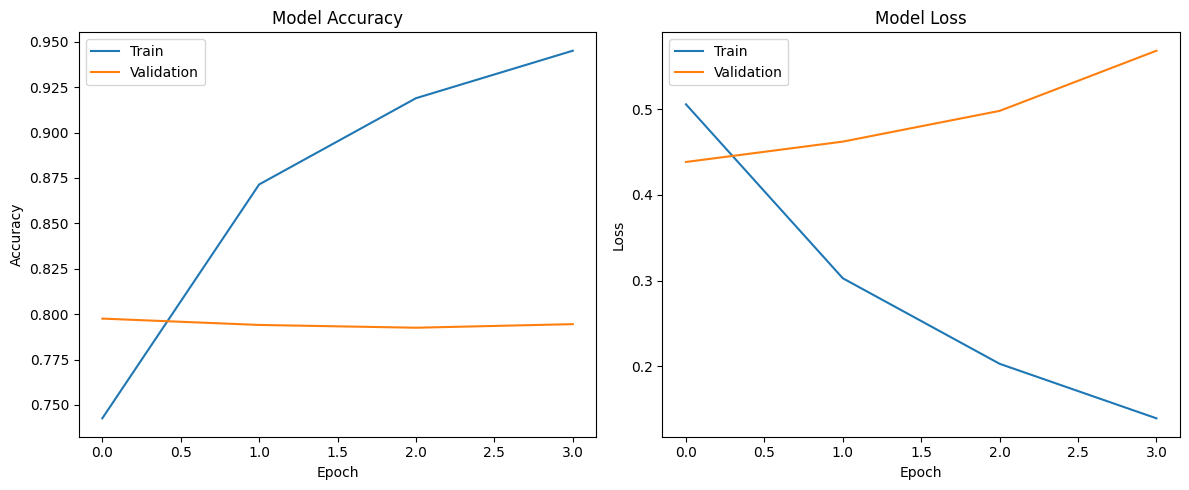

179/179 [==============================] - 5s 14ms/step
Bidirectional LSTM Accuracy: 0.7862

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      2997
           1       0.74      0.85      0.79      2727

    accuracy                           0.79      5724
   macro avg       0.79      0.79      0.79      5724
weighted avg       0.79      0.79      0.79      5724



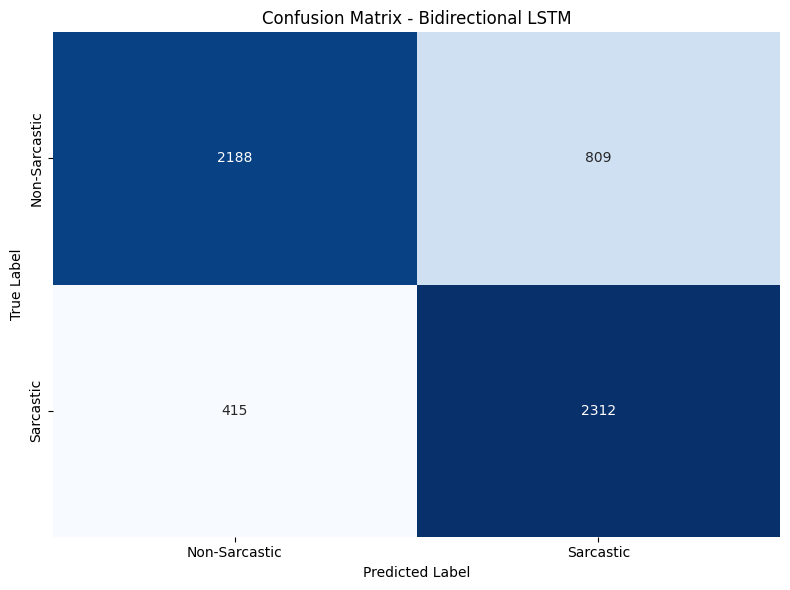

In [10]:
if data is not None:
    # Build Bidirectional LSTM model
    bidirectional_lstm_model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        SpatialDropout1D(0.2),
        Bidirectional(LSTM(128, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(64)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    bidirectional_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Display model summary
    bidirectional_lstm_model.summary()

    # Define callbacks for Bidirectional LSTM model
    bidirectional_lstm_checkpoint = ModelCheckpoint('bidirectional_lstm_model.h5', monitor='val_accuracy',
                                                save_best_only=True, mode='max')

    # Train the Bidirectional LSTM model
    bidirectional_lstm_history = bidirectional_lstm_model.fit(
        X_train_padded, y_train,
        epochs=20,
        batch_size=64,
        validation_split=VALIDATION_SPLIT,
        callbacks=[early_stopping, bidirectional_lstm_checkpoint],
        verbose=1
    )

    # Plot Bidirectional LSTM training history
    plot_training_history(bidirectional_lstm_history)

    # Evaluate Bidirectional LSTM model
    bidirectional_lstm_accuracy = evaluate_model(bidirectional_lstm_model, X_test_padded, y_test, "Bidirectional LSTM")

### 8.5 LSTM with Pre-trained Word2Vec Embeddings

Using pre-trained word embeddings can improve model performance:
- Google News pre-trained vectors (300 dimensions)
- Non-trainable embedding layer initialized with pre-trained vectors
- May capture better semantic relationships between words

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Pre-trained Word2Vec embeddings downloaded successfully.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 11, 300)           3000000   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 11, 300)          0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 11, 128)           219648    
                                                                 
 dropout_8 (Dropout)         (None, 11, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                          

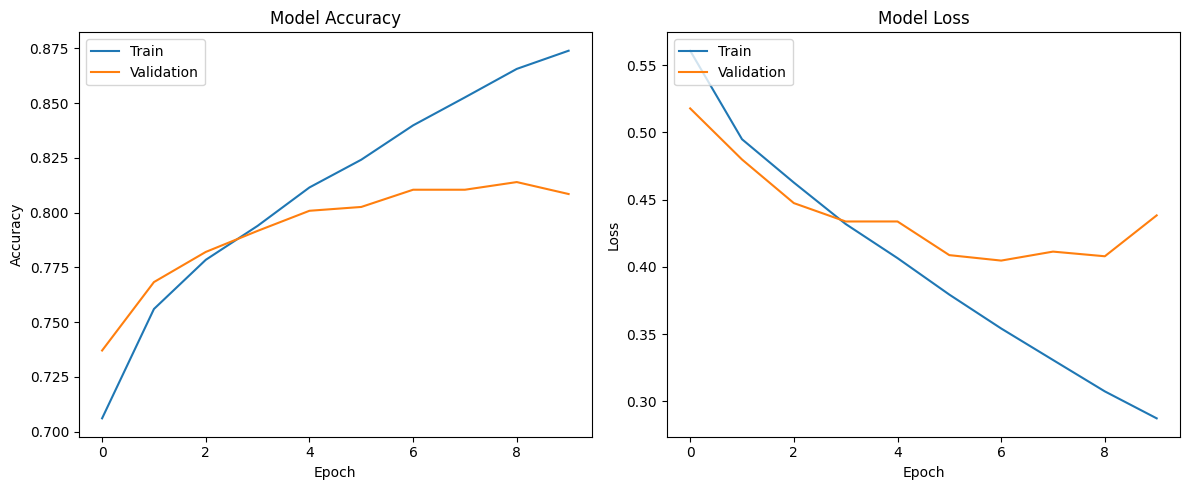

179/179 [==============================] - 3s 11ms/step
Word2Vec LSTM Accuracy: 0.8075

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2997
           1       0.78      0.82      0.80      2727

    accuracy                           0.81      5724
   macro avg       0.81      0.81      0.81      5724
weighted avg       0.81      0.81      0.81      5724



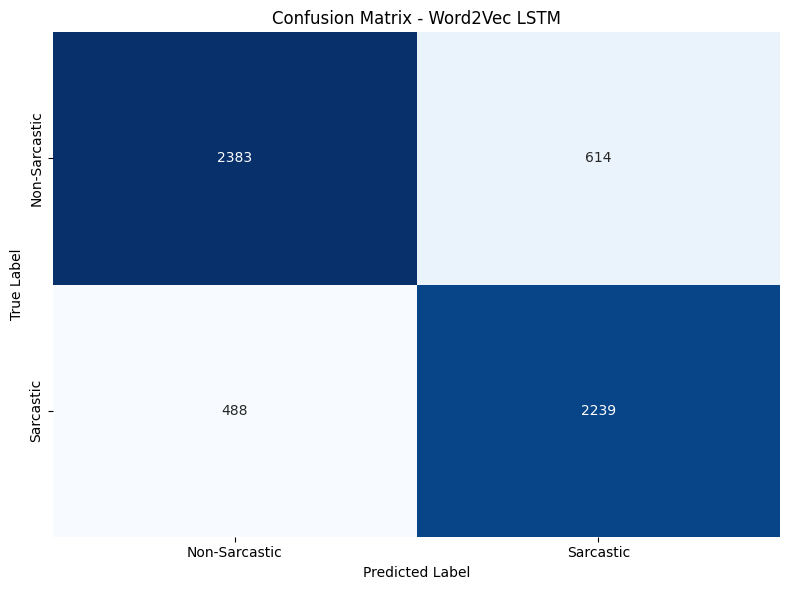

In [11]:
if data is not None:
    # Download pre-trained Word2Vec embeddings from Google News
    try:
        import gensim.downloader as api
        print("Downloading pre-trained Word2Vec embeddings (this may take a while)...")
        word2vec_model = api.load("word2vec-google-news-300")
        EMBEDDING_DIM = 300  # Google's pre-trained vectors are 300-dimensional
        print("Pre-trained Word2Vec embeddings downloaded successfully.")
    except Exception as e:
        print(f"Could not download pre-trained embeddings: {e}")
        print("Falling back to training Word2Vec on our dataset.")
        # Creating a Word2Vec model from our dataset
        # Tokenize all headlines
        all_headlines = data['cleaned_headline'].apply(lambda x: x.split()).values.tolist()

        # Train Word2Vec model
        word2vec_model = Word2Vec(sentences=all_headlines, vector_size=EMBEDDING_DIM, window=5, min_count=1, workers=4)

    # Create embedding matrix
    embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    for word, i in word_index.items():
        if i >= vocab_size:
            continue
        try:
            # For Google's pre-trained vectors:
            if hasattr(word2vec_model, 'get_vector'):
                if word in word2vec_model:
                    embedding_vector = word2vec_model.get_vector(word)
                    embedding_matrix[i] = embedding_vector
            # For our trained model:
            else:
                embedding_vector = word2vec_model.wv[word]
                embedding_matrix[i] = embedding_vector
        except KeyError:
            embedding_matrix[i] = np.random.normal(0, np.sqrt(0.25), EMBEDDING_DIM)

    # Build LSTM model with pre-trained embeddings
    w2v_lstm_model = Sequential([
        Embedding(input_dim=vocab_size,
                  output_dim=EMBEDDING_DIM,
                  weights=[embedding_matrix],
                  input_length=MAX_SEQUENCE_LENGTH,
                  trainable=False),  # Freeze the embeddings
        SpatialDropout1D(0.2),
        LSTM(128, return_sequences=True),
        Dropout(0.3),
        LSTM(64),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    w2v_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Display model summary
    w2v_lstm_model.summary()

    # Define callbacks
    w2v_lstm_checkpoint = ModelCheckpoint('w2v_lstm_model.h5', monitor='val_accuracy',
                                        save_best_only=True, mode='max')

    # Train the model
    w2v_lstm_history = w2v_lstm_model.fit(
        X_train_padded, y_train,
        epochs=20,
        batch_size=64,
        validation_split=VALIDATION_SPLIT,
        callbacks=[early_stopping, w2v_lstm_checkpoint],
        verbose=1
    )

    # Plot training history
    plot_training_history(w2v_lstm_history)

    # Evaluate model
    w2v_lstm_accuracy = evaluate_model(w2v_lstm_model, X_test_padded, y_test, "Word2Vec LSTM")

## 9. Model Comparison

After training all models, we'll compare their performance:
- Accuracy metrics across all models
- Visual comparison with bar charts
- Identification of the best performing model
- Saving the best model for deployment

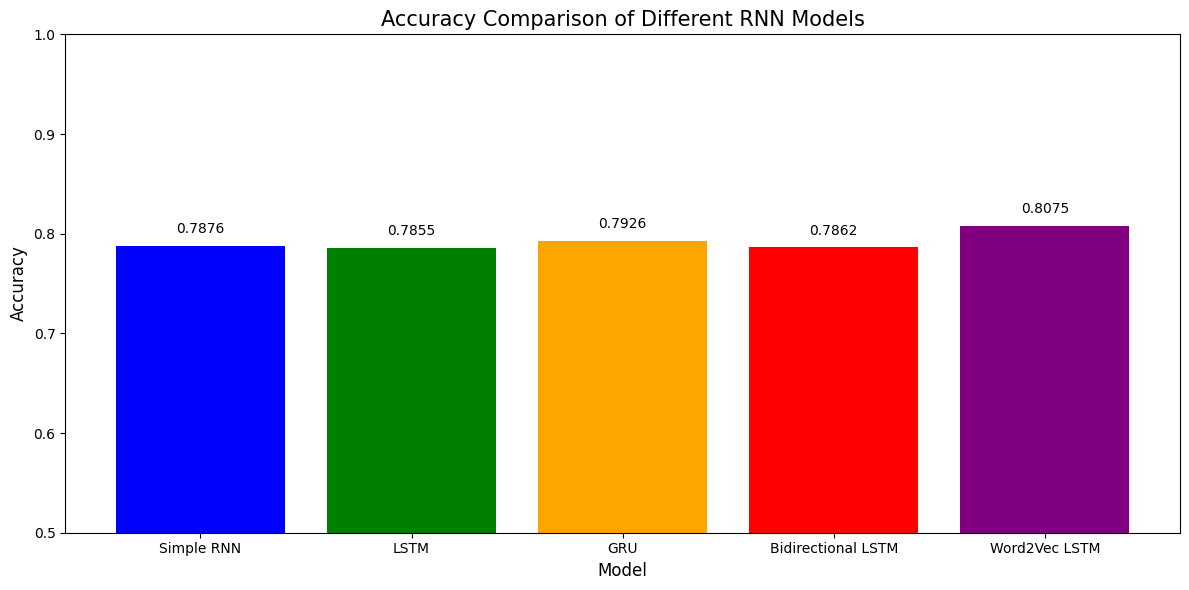

The best performing model is: Word2Vec LSTM with accuracy: 0.8075


In [12]:
if data is not None:
    # Create a dictionary to store model accuracies
    model_accuracies = {
        'Simple RNN': simple_rnn_accuracy,
        'LSTM': lstm_accuracy,
        'GRU': gru_accuracy,
        'Bidirectional LSTM': bidirectional_lstm_accuracy,
        'Word2Vec LSTM': w2v_lstm_accuracy
    }

    # Plot model comparison
    plt.figure(figsize=(12, 6))
    models = list(model_accuracies.keys())
    accuracies = list(model_accuracies.values())

    # Create bar plot
    bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
    plt.title('Accuracy Comparison of Different RNN Models', fontsize=15)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.ylim(0.5, 1.0)  # Setting y-axis range for better visualization

    # Add accuracy values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Find and save the best model
    best_model_name = max(model_accuracies, key=model_accuracies.get)
    print(f"The best performing model is: {best_model_name} with accuracy: {model_accuracies[best_model_name]:.4f}")

    # Get the best model
    if best_model_name == 'Simple RNN':
        best_model = simple_rnn_model
    elif best_model_name == 'LSTM':
        best_model = lstm_model
    elif best_model_name == 'GRU':
        best_model = gru_model
    elif best_model_name == 'Bidirectional LSTM':
        best_model = bidirectional_lstm_model
    else:  # Word2Vec LSTM
        best_model = w2v_lstm_model

    # Save the best model and tokenizer
    best_model.save('best_model.h5')

    # Save tokenizer
    import pickle
    with open('tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

## 10. Making Predictions on New Data

We'll test our best model on new headlines:
- Function to preprocess and predict on new text
- Example predictions on various headlines
- Confidence scores for each prediction

In [13]:
# Define a function to preprocess new data and make predictions
def predict_sarcasm(headline, model, tokenizer, max_len=MAX_SEQUENCE_LENGTH):
    # Clean the text
    cleaned_headline = clean_text(headline)

    # Lemmatize the text
    lemmatized_headline = lemmatize_text(cleaned_headline)

    # Convert to sequence
    sequence = tokenizer.texts_to_sequences([lemmatized_headline])

    # Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')

    # Make prediction
    prediction = model.predict(padded_sequence)[0][0]

    # Return result
    is_sarcastic = prediction > 0.5
    confidence = prediction if is_sarcastic else 1 - prediction

    return {
        'headline': headline,
        'is_sarcastic': bool(is_sarcastic),
        'confidence': float(confidence),
        'prediction': f"{'Sarcastic' if is_sarcastic else 'Non-Sarcastic'} (Confidence: {confidence:.2f})"
    }

if data is not None:
    # Try some example headlines
    example_headlines = [
        "Scientists discover new planet that could support life",
        "Local man wins lottery for the fifth time this year",
        "New study reveals drinking coffee may reduce risk of heart disease",
        "Man shocked to discover water is wet",
        "Breaking news: Politicians found to be telling the truth all along"
    ]

    # Make predictions on example headlines
    for headline in example_headlines:
        result = predict_sarcasm(headline, best_model, tokenizer)
        print(f"Headline: {result['headline']}")
        print(f"Prediction: {result['prediction']}\n")

1/1 [==============================] - 0s 19ms/step
Headline: Scientists discover new planet that could support life
Prediction: Sarcastic (Confidence: 0.93)

1/1 [==============================] - 0s 17ms/step
Headline: Local man wins lottery for the fifth time this year
Prediction: Sarcastic (Confidence: 0.99)

1/1 [==============================] - 0s 18ms/step
Headline: New study reveals drinking coffee may reduce risk of heart disease
Prediction: Sarcastic (Confidence: 0.97)

1/1 [==============================] - 0s 16ms/step
Headline: Man shocked to discover water is wet
Prediction: Sarcastic (Confidence: 1.00)

1/1 [==============================] - 0s 16ms/step
Headline: Breaking news: Politicians found to be telling the truth all along
Prediction: Sarcastic (Confidence: 0.66)



## 11. GUI for Real-Time Prediction

Finally, we'll create an interactive interface for sarcasm detection:
- Gradio web interface for entering headlines
- Real-time prediction using our best model
- Shareable link for others to test the model

In [14]:
# Function to create and launch the GUI
def create_gui():
    # Load the best model and tokenizer
    try:
        model = load_model('best_model.h5')
        with open('tokenizer.pickle', 'rb') as handle:
            tokenizer = pickle.load(handle)

        # Define prediction function for Gradio
        def predict_sarcasm_gui(headline):
            result = predict_sarcasm(headline, model, tokenizer)
            return result['prediction']

        # Create Gradio interface
        interface = gr.Interface(
            fn=predict_sarcasm_gui,
            inputs=gr.Textbox(lines=2, placeholder="Enter a headline..."),
            outputs="text",
            title="Sarcasm Detection in Headlines",
            description="Enter a news headline to classify it as sarcastic or non-sarcastic."
        )

        # Launch the interface
        interface.launch(share=True)
    except Exception as e:
        print(f"Error creating GUI: {e}")
        print("Please run the complete model training first to generate the necessary files.")

# Create and launch the GUI
if data is not None:
    create_gui()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7cb7c74345691b56d0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Conclusion and Future Work

### Conclusion
In this project, we built and compared different RNN-based models for sarcasm detection in news headlines. We implemented:

1. Simple RNN Model
2. LSTM Model
3. GRU Model
4. Bidirectional LSTM Model
5. LSTM with Word2Vec Embeddings

Our results show the effectiveness of deep learning approaches for this task. We observed that detecting sarcasm is challenging
even for advanced deep learning models, as sarcasm relies on contextual understanding, cultural knowledge, and awareness of
contradictions between literal meanings and intended messages.

### Future Work
Some potential improvements and extensions for this project include:

1. **Transfer Learning**: Using pre-trained language models like BERT, which have shown state-of-the-art performance on NLP tasks.

2. **Additional Features**: Incorporating features such as sentiment scores, part-of-speech tags, or contextual information.

3. **Ensemble Methods**: Combining predictions from multiple models to improve overall performance.

4. **Data Augmentation**: Generating additional training examples to help the model generalize better.

5. **Context-Aware Models**: Developing models that can capture broader context beyond individual headlines.

6. **Error Analysis**: Performing detailed analysis to understand where the model fails and targeting those areas for improvement.